3.Import the required packages with their customary aliases as follows:
    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`


In [272]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [274]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [276]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [278]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [280]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [282]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


In [284]:
# 6. Drop the `Value Footnotes` column 
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [286]:
#  rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
print(gdp_df.describe())

              Year  GDP_Per_Capita
count  8219.000000     8219.000000
mean   2006.672345    20270.976242
std       9.782986    22532.004246
min    1990.000000      510.822823
25%    1998.000000     4284.868430
50%    2007.000000    11916.457927
75%    2015.000000    28543.305542
max    2023.000000   174339.077325


In [288]:
# 7. How many countries have data for all years? 
total_years = gdp_df['Year'].nunique()
print(f"Total unique years in the dataset: {total_years}")

Total unique years in the dataset: 34


In [290]:
country_year_counts = gdp_df.groupby(['Country','Year']).count()
print(country_year_counts)

                  GDP_Per_Capita
Country     Year                
Afghanistan 2000               1
            2001               1
            2002               1
            2003               1
            2004               1
...                          ...
Zimbabwe    2019               1
            2020               1
            2021               1
            2022               1
            2023               1

[8219 rows x 1 columns]


In [292]:
countries_with_all_years = country_year_counts[country_year_counts == total_years]

In [294]:
countries_with_all_years

GDP_Per_Capita
Country     Year                
Afghanistan 2000             NaN
            2001             NaN
            2002             NaN
            2003             NaN
            2004             NaN
...                          ...
Zimbabwe    2019             NaN
            2020             NaN
            2021             NaN
            2022             NaN
            2023             NaN

[8219 rows x 1 columns]

In [296]:
number_of_countries = len(countries_with_all_years)
print(number_of_countries)

8219


In [298]:
# Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
print(countries_with_all_years.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8219 entries, ('Afghanistan', 2000) to ('Zimbabwe', 2023)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GDP_Per_Capita  0 non-null      float64
dtypes: float64(1)
memory usage: 90.6+ KB
None


In [300]:
country_year_counts = gdp_df.groupby(['Country','Year']).count()
print(country_year_counts.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8219 entries, ('Afghanistan', 2000) to ('Zimbabwe', 2023)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GDP_Per_Capita  8219 non-null   int64
dtypes: int64(1)
memory usage: 90.6+ KB
None


In [302]:
 gdp_df[gdp_df["Year"] == 2020]["GDP_Per_Capita"]

3        2769.685745
27       3861.111238
61       4622.731427
95      14650.395929
129     14194.155748
            ...     
8068    45055.782930
8090     5423.682547
8120    18600.986362
8154     3391.595412
8188     2987.269823
Name: GDP_Per_Capita, Length: 247, dtype: float64

In [304]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [306]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
rows2020 = gdp_df["Year"] == 2020
gdp_distribution = gdp_df[rows2020]
gdp_distribution

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


In [308]:
gdp_distribution = gdp_distribution["GDP_Per_Capita"]
gdp_distribution

3        2769.685745
27       3861.111238
61       4622.731427
95      14650.395929
129     14194.155748
            ...     
8068    45055.782930
8090     5423.682547
8120    18600.986362
8154     3391.595412
8188     2987.269823
Name: GDP_Per_Capita, Length: 247, dtype: float64

Text(0, 0.5, 'Count')

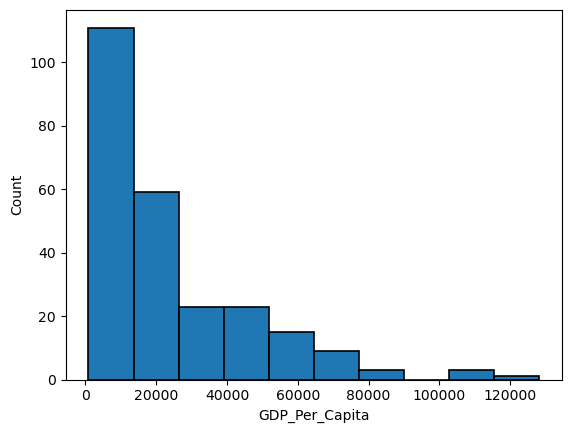

In [310]:
#Create a histogram
plt.hist(gdp_distribution, edgecolor='black', linewidth=1.2)
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Count")

Text(0.5, 0, 'GDP_Per_Capita')

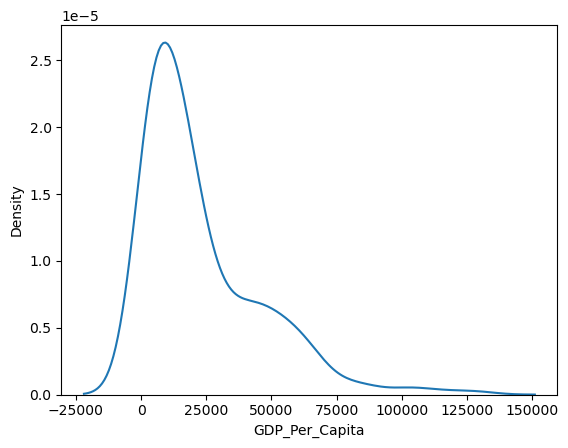

In [311]:
# density plot
sns.kdeplot(gdp_distribution)
plt.xlabel("GDP_Per_Capita")

<Axes: xlabel='GDP_Per_Capita'>

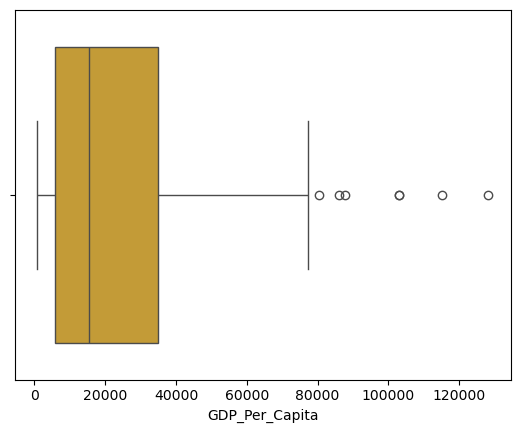

In [313]:
# a boxplot
sns.boxplot( gdp_distribution, orient="h", color="goldenrod")

<Axes: xlabel='GDP_Per_Capita'>

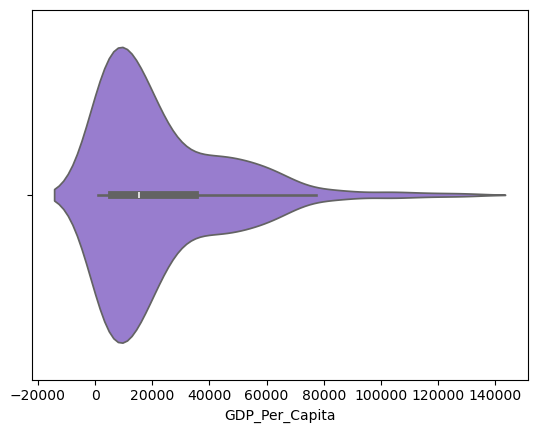

In [315]:
# a violin plot
sns.violinplot(gdp_distribution,orient="h", color="mediumpurple")

In [317]:
# 9. What was the median GDP per capita value in 2020?
gdp_distribution.median()

15309.23598817024

In [319]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [406]:
# 10. compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
# Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.
# rows_selected = (gdp_df["Year"] == 1990) | (gdp_df["Year"] == 2000) | (gdp_df["Year"] == 2000 ) | (gdp_df["Year"] == 2000)
rows_selected = gdp_df["Year"].isin([ 1990, 2000, 2010, 2020])
gdp_decades = gdp_df[rows_selected]
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

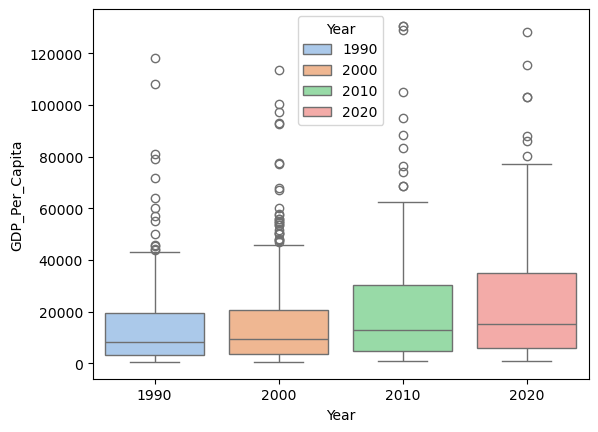

In [408]:
# A boxplot
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], hue=gdp_decades["Year"], palette="pastel")    

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

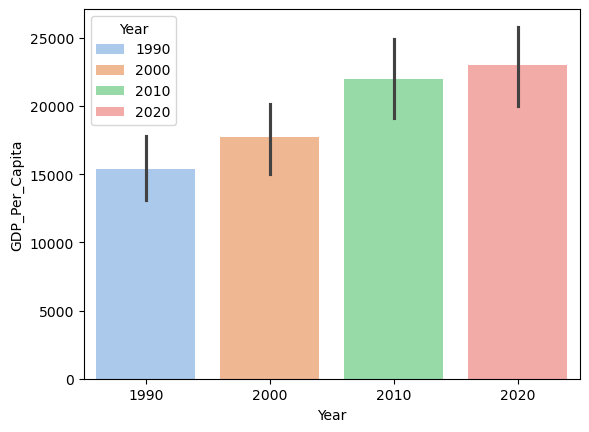

In [422]:
# A barplot
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], hue=gdp_decades["Year"], palette="pastel")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

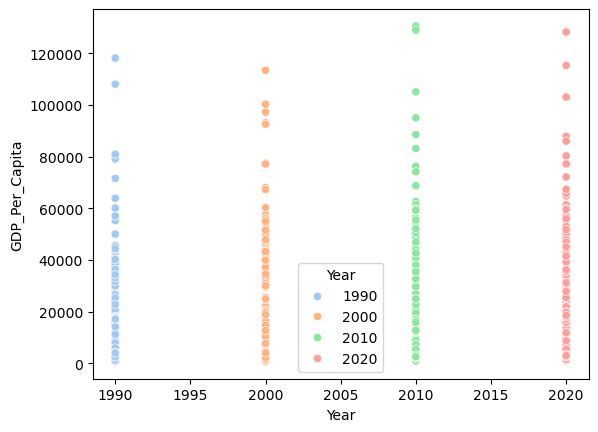

In [878]:
#A scatterplot
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], hue=gdp_decades["Year"], palette="pastel")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

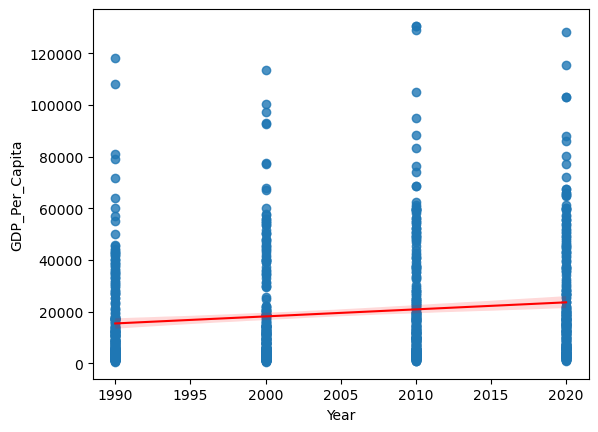

In [630]:
#A scatterplot with a trend line overlaid 
sns.regplot(x=gdp_decades["Year"], 
            y=gdp_decades["GDP_Per_Capita"], 
            line_kws={"color": "red", "linewidth": 1.5})

In [430]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?
gdp_df[gdp_df["GDP_Per_Capita"] > 100000].sort_values(by="Year").head(1)

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464


In [432]:
# 12. Which country had the highest GDP per capita in 2020?
gdp_df[gdp_df["Year"] == 2020].sort_values(by="GDP_Per_Capita", ascending=False).head(1)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


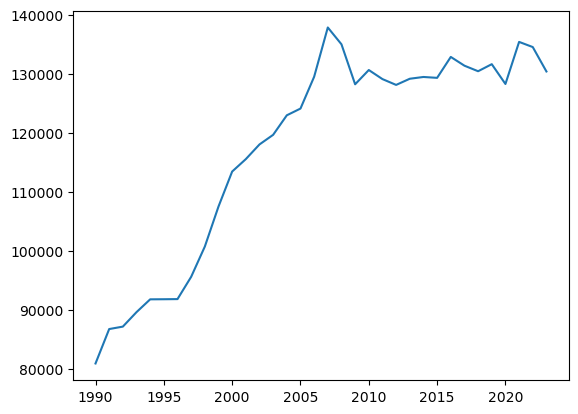

In [434]:
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset
plt.plot(gdp_df[gdp_df["Country"] == "Luxembourg"]["Year"], gdp_df[gdp_df["Country"] == "Luxembourg"]["GDP_Per_Capita"])


In [436]:
# 13. Which country had the lowest GDP per capita in 2020?
gdp_df[gdp_df["Year"] == 2020].sort_values(by="GDP_Per_Capita", ascending=True).head(1)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


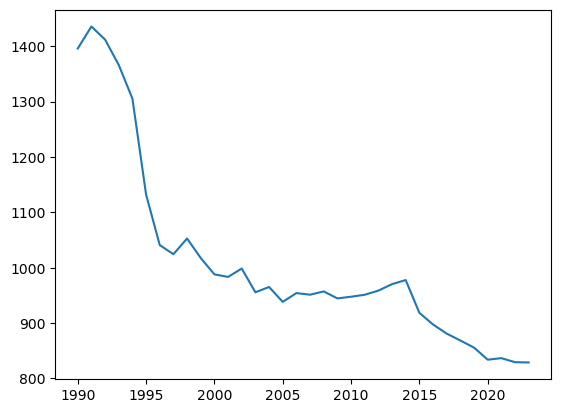

In [438]:
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
plt.plot(gdp_df[gdp_df["Country"] == "Burundi"]["Year"], gdp_df[gdp_df["Country"] == "Burundi"]["GDP_Per_Capita"])

In [488]:
#**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990?
#rows_year = gdp_df["Year"].isin([ 1990,  2020])
#gdp_higher = gdp_df[rows_year]
gdps_1990 = gdp_df[gdp_df["Year"] == 1990].drop(columns=["Year"]).set_index("Country")
gdps_2020 = gdp_df[gdp_df["Year"] == 2020].drop(columns=["Year"]).set_index("Country")
gdp_comparison = gdps_1990.join(gdps_2020, lsuffix="_1990", rsuffix="_2020")
gdp_trend = gdp_comparison["GDP_Per_Capita_2020"] - gdp_comparison["GDP_Per_Capita_1990"] 
np.mean(gdp_trend)
# Yes it did grow.

7376.2778739705645

In [490]:
# Which countries had lower GDP per capita in 2020 than in 1990?
gdp_comparison[gdp_trend < 0]

,GDP_Per_Capita_1990,GDP_Per_Capita_2020
Country,,
Aruba,34579.220640,28521.688852
Barbados,16976.761648,15749.038017
Brunei,118163.683198,80280.897948
Burundi,1396.077627,833.920257
Central African Republic,1481.252551,1136.570530
Congo,8699.526839,6350.509134
Dem. Rep. Congo,2172.001597,1277.632863
Fragile and conflict affected situations,6062.707946,5271.014406
Gabon,23884.810700,18681.484074


In [888]:
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this.
#Check the arguments for the read_csv function to find ones that can help correct the errors 
int_df = pd.read_csv('../data/internet.csv', on_bad_lines="skip", skipfooter=299, engine="python")
int_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6077,Zimbabwe,1998,0.081648,NaN
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN


In [521]:
#take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
int_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [522]:
int_df.tail()

,Country or Area,Year,Value,Value Footnotes
6077,Zimbabwe,1998,0.081648,NaN
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [523]:
int_df.describe()

,Year,Value
count,6082.000000,6082.000000
mean,2007.209964,29.660464
std,8.814547,31.381747
min,1990.000000,0.000000
25%,2000.000000,1.497465
50%,2007.000000,16.569450
75%,2015.000000,55.670675
max,2023.000000,100.000000


In [528]:
# 15. Drop the `Value Footnotes`.
int_df = int_df.drop('Value Footnotes', axis=1)

In [530]:
# rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'
int_df = int_df.rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})
print(int_df.describe())

              Year  Internet_Users_Pct
count  6082.000000         6082.000000
mean   2007.209964           29.660464
std       8.814547           31.381747
min    1990.000000            0.000000
25%    2000.000000            1.497465
50%    2007.000000           16.569450
75%    2015.000000           55.670675
max    2023.000000          100.000000


In [582]:
# 16. Look at the number of observations in this dataset per year. What do you notice
int_df.groupby("Year").count()
# There is an increase from 1991 to 2023. Dataset ends mid 2023

,Country,Internet_Users_Pct
Year,,
1990,225,225
1991,39,39
1992,50,50
1993,66,66
1994,92,92
1995,141,141
1996,177,177
1997,188,188
1998,195,195


In [548]:
# 17. What is the first year to have a non-zero internet users percentage value?
int_df[int_df["Internet_Users_Pct"] > 0].sort_values(by="Year").head(1)

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277


In [608]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
int_2000 = int_df[int_df["Year"] == 2000].drop(columns=["Year"]).set_index("Country")
int_2014 = int_df[int_df["Year"] == 2014].drop(columns=["Year"]).set_index("Country")
int_comparison = int_2000.join(int_2014, lsuffix="_2000", rsuffix="_2014")
int_trend = int_comparison["Internet_Users_Pct_2014"] - int_comparison["Internet_Users_Pct_2000"] 
np.mean(int_trend)
# There is an average 37% increase in internet usage 

37.47148912969231

In [614]:
# 19. For how many countries was the percentage of internet users below 5% in 2014?
rows2014 = int_df["Year"] == 2014
rowsbelow5 = int_df["Internet_Users_Pct"] < 5
int_per = int_df[rows2014 & rowsbelow5]
int_per

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [686]:
# 20. Merge the two DataFrames to one.
# Do this in a way that keeps **all rows** from each of the two DataFrames. 
# Call the new DataFrame `gdp_and_internet_use`.

gdp_and_internet_use = pd.concat([gdp_df, int_df], ignore_index=True, sort=False)
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
14296,Zimbabwe,1998,NaN,0.081648
14297,Zimbabwe,1997,NaN,0.033080
14298,Zimbabwe,1996,NaN,0.016790
14299,Zimbabwe,1995,NaN,0.007684


In [688]:
# Look at the first and last few rows to confirm that it merged correctly.
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [690]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14296,Zimbabwe,1998,NaN,0.081648
14297,Zimbabwe,1997,NaN,0.033080
14298,Zimbabwe,1996,NaN,0.016790
14299,Zimbabwe,1995,NaN,0.007684
14300,Zimbabwe,1994,NaN,0.001739


In [692]:
# 21. Find the three countries with the highest internet users percentage in 2014. 
gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014].sort_values(by="Internet_Users_Pct", ascending=False).head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10811,Iceland,2014,NaN,98.158
10112,Falkland (Malvinas) Islands,2014,NaN,97.600
8821,Bermuda,2014,NaN,96.800


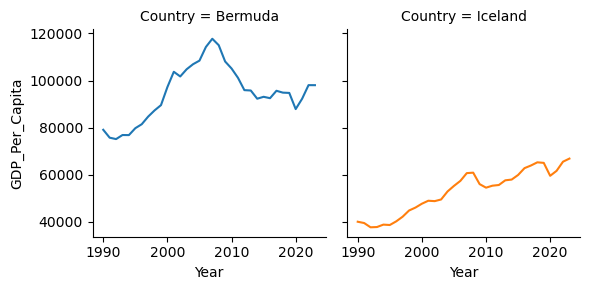

In [778]:
# Use a seaborn FacetGrid.
# compare how the GDP per capita has changed over time for these three countries. What do you notice?
select_countries = gdp_and_internet_use["Country"].isin(["Iceland", "Falkland (Malvinas) Islands", "Bermuda"])
select_falkland = gdp_and_internet_use["Country"] == "Falkland (Malvinas) Islands"
select_gdp = ~np.isnan(gdp_and_internet_use["GDP_Per_Capita"])
top_int_df = gdp_and_internet_use[(select_countries | select_falkland) & select_gdp]
g = sns.FacetGrid(top_int_df, col="Country", hue="Country")
g = g.map(plt.plot, 'Year', 'GDP_Per_Capita')
# Falkland did not have GDP data 

In [696]:
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
gdp_and_internet_use_2014 = (gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014])
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2014,3017.942544,NaN
33,Africa Eastern and Southern,2014,4052.851526,NaN
67,Africa Western and Central,2014,4816.917355,NaN
101,Albania,2014,12788.747231,NaN
135,Algeria,2014,15073.762940,NaN
...,...,...,...,...
14156,Viet Nam,2014,NaN,41.0000
14179,Virgin Islands (US),2014,NaN,50.0700
14222,Yemen,2014,NaN,22.5500
14250,Zambia,2014,NaN,6.5000


Text(0, 0.5, 'Internet_Users_Pct')

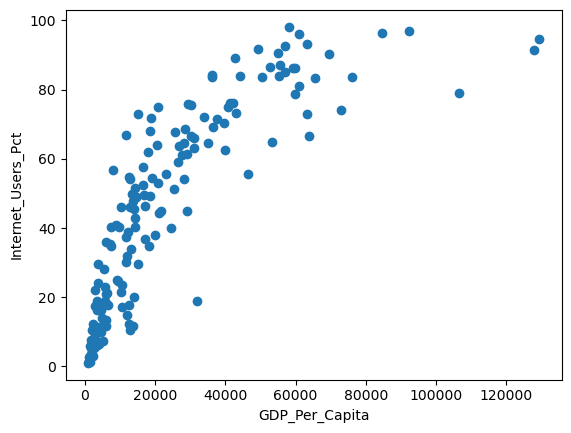

In [876]:
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014.
# What do you notice from this plot? If you see any unusual points, investigate them.
gdps_x = gdp_and_internet_use_2014[np.isnan(gdp_and_internet_use_2014["Internet_Users_Pct"])].drop(columns="Internet_Users_Pct").set_index(["Country", "Year"])
internet_y = gdp_and_internet_use_2014[np.isnan(gdp_and_internet_use_2014["GDP_Per_Capita"])].drop(columns="GDP_Per_Capita").set_index(["Country", "Year"])
plotting_data = gdps_x.join(internet_y, how="inner")
plt.scatter(plotting_data["GDP_Per_Capita"], plotting_data["Internet_Users_Pct"])

plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Users_Pct')



In [ ]:
# 24. **Stretch Question:** Use the `qcut` function from pandas 
# to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values.
# Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [ ]:
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?